<a href="https://colab.research.google.com/github/Manvitha236/Peer/blob/main/PredictingObesityLevels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [4]:
df=pd.read_excel('/content/drive/MyDrive/obesity_data_with_status_50000.xlsx')

In [5]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region,Obesity_Status
0,56,0,172.005936,68.686179,23.215738,4,1,2,0,1,Hypertension Stage 2,2,1,3,2,Normal weight
1,69,1,161.678497,79.937723,30.580688,2,0,0,0,0,Elevated,1,2,1,3,Obese
2,46,1,172.078597,99.707918,33.672545,4,1,1,1,0,Normal,3,2,3,2,Obese
3,32,1,176.845709,76.314302,24.401520,1,2,0,1,0,Normal,3,1,2,1,Normal weight
4,60,1,170.875161,84.397860,28.905039,2,1,0,2,1,Elevated,2,3,3,2,Overweight


In [6]:
df.shape

(50000, 16)

In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
BMI,0
Physical_Activity_Level,0
Diet_Type,0
Smoking_Habits,0
Alcohol_Consumption,0
Family_History_Obesity,0


In [8]:
df.describe()

,Age,Gender,Height_cm,Weight_kg,BMI,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,49.027820,0.502680,170.057639,75.033948,26.216871,2.503460,0.999740,0.999600,0.999420,0.500340,1.997060,3.013540,2.005140,2.000720
std,18.170405,0.499998,10.016536,15.003175,6.132110,1.120309,0.817235,0.817076,0.818311,0.500005,0.816569,1.414255,0.816803,0.816072
min,18.000000,0.000000,125.370315,15.010016,4.580646,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,0.000000,163.334167,64.947842,21.986022,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
50%,49.000000,1.000000,170.082574,75.018968,25.831097,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000
75%,65.000000,1.000000,176.805005,85.127597,30.094902,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,4.000000,3.000000,3.000000
max,80.000000,1.000000,208.297822,138.030388,56.835831,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,5.000000,3.000000,3.000000


In [9]:
x=df.drop('Obesity_Status',axis=1)
y=df['Obesity_Status']

In [10]:
y.value_counts()

,count
Obesity_Status,
Normal weight,17459
Overweight,15102
Obese,12760
Underweight,4679


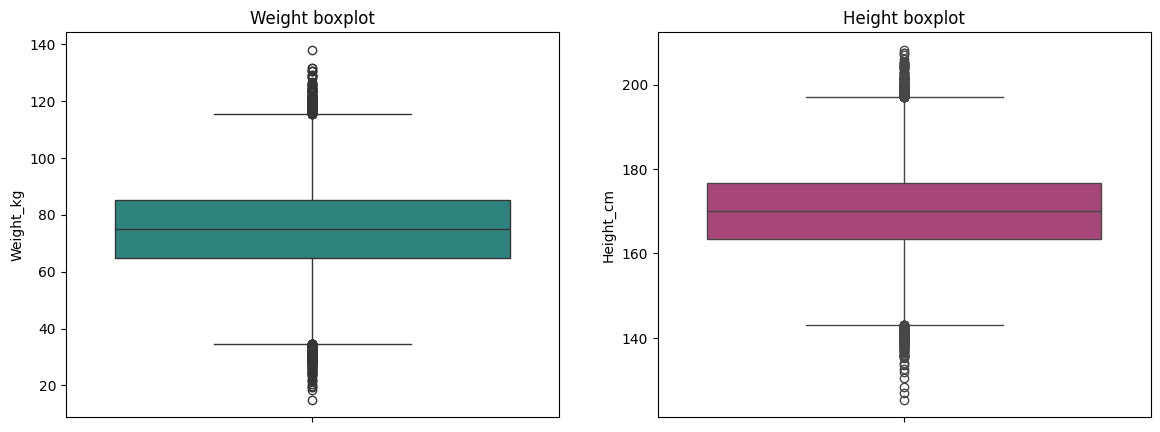

In [11]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(ax=axes[0],y=df['Weight_kg'],palette='viridis')
axes[0].set_title('Weight boxplot')
sns.boxplot(ax=axes[1],y=df['Height_cm'],palette='magma')
axes[1].set_title('Height boxplot')
plt.show()

In [12]:
def remove_outliers(df, column, threshold=3):
  z_scores=np.abs((df[column]-df[column].mean())/df[column].std())
  df=df[(z_scores<threshold)]
  return df

In [13]:
df=remove_outliers(df,'Weight_kg')

In [14]:
df=remove_outliers(df,'Height_cm')

In [15]:
df.shape

(49744, 16)

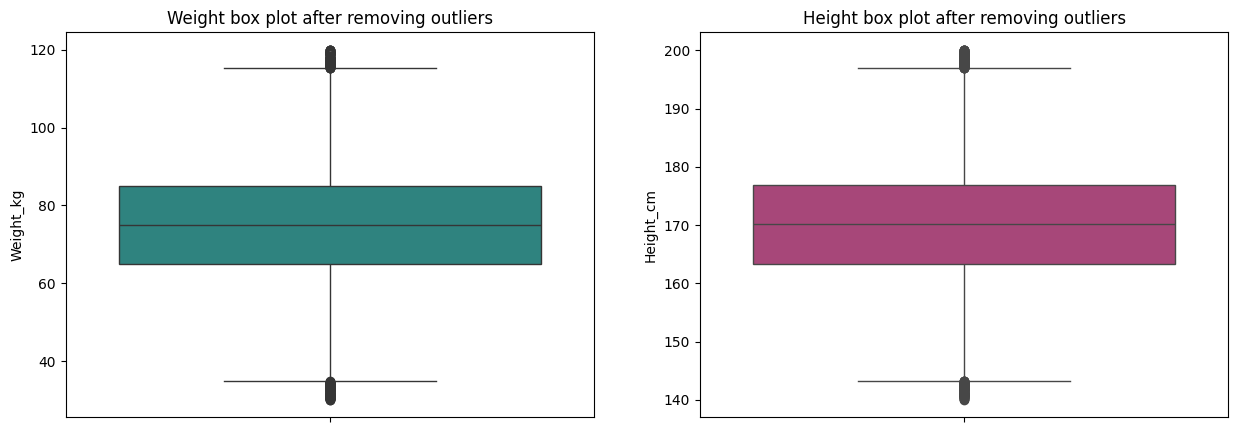

In [16]:
fig , axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(ax=axes[0], y=df['Weight_kg'], palette='viridis')
axes[0].set_title('Weight box plot after removing outliers')

sns.boxplot(ax=axes[1], y=df['Height_cm'], palette='magma')
axes[1].set_title('Height box plot after removing outliers')

plt.show()

In [17]:
y.value_counts()

,count
Obesity_Status,
Normal weight,17459
Overweight,15102
Obese,12760
Underweight,4679


In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
l = LabelEncoder()
df['Blood_Pressure'] = l.fit_transform(df['Blood_Pressure'])
df['Obesity_Status'] = l.fit_transform(df['Obesity_Status'])
x['Blood_Pressure'] = l.fit_transform(x['Blood_Pressure'])
y = l.fit_transform(y)

In [20]:
s = StandardScaler()
df[['Height_cm','Weight_kg']] = s.fit_transform(df[['Height_cm','Weight_kg']])
x[['Height_cm','Weight_kg']] = s.fit_transform(x[['Height_cm','Weight_kg']])

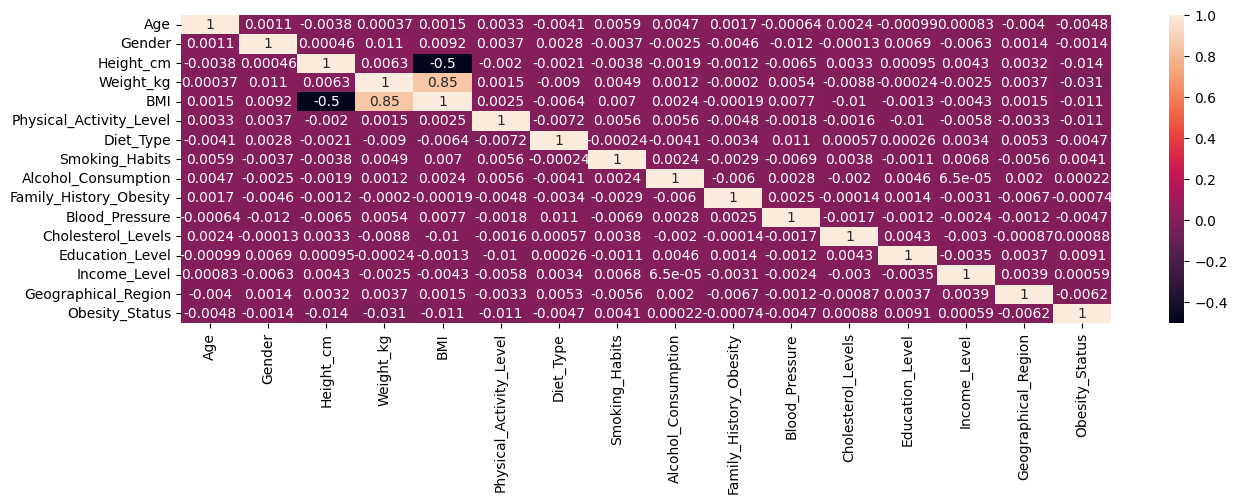

In [21]:
fig = plt.figure(figsize=(15,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
df=df.drop('BMI',axis=1)

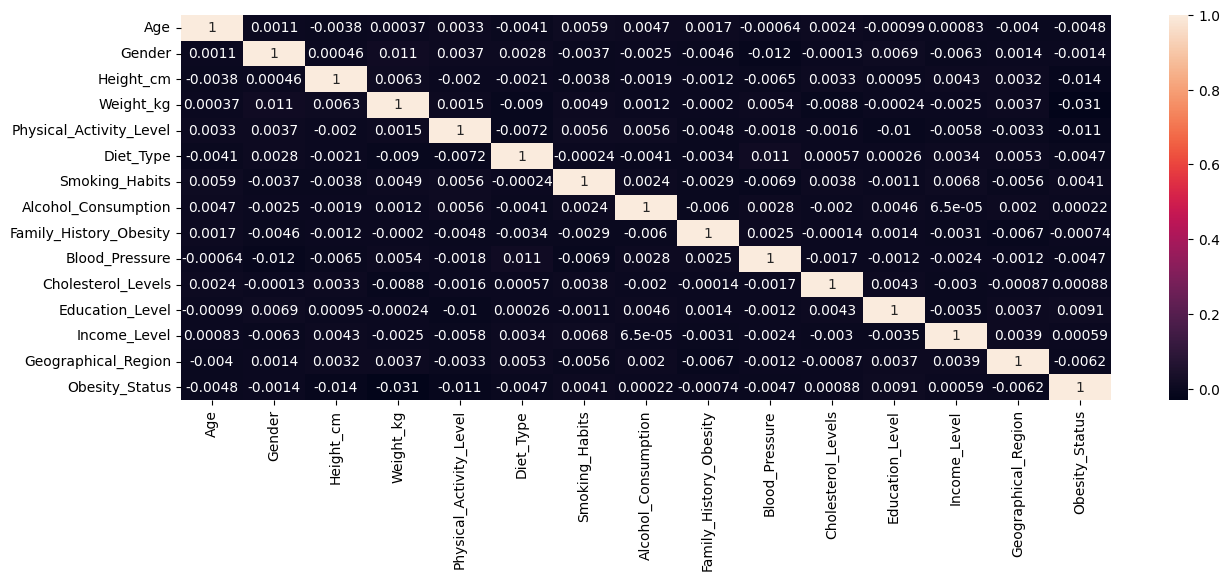

In [23]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

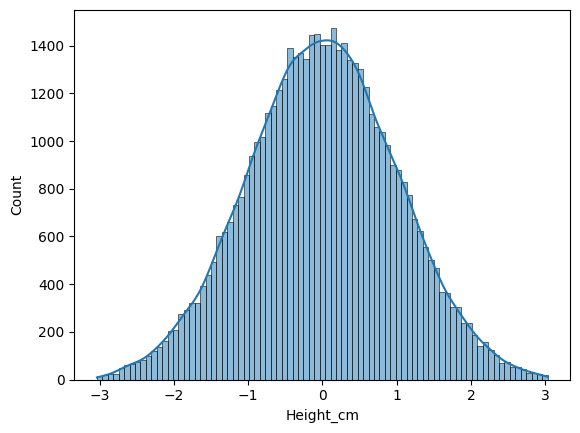

In [24]:
sns.histplot(df['Height_cm'],kde=True)
plt.show()

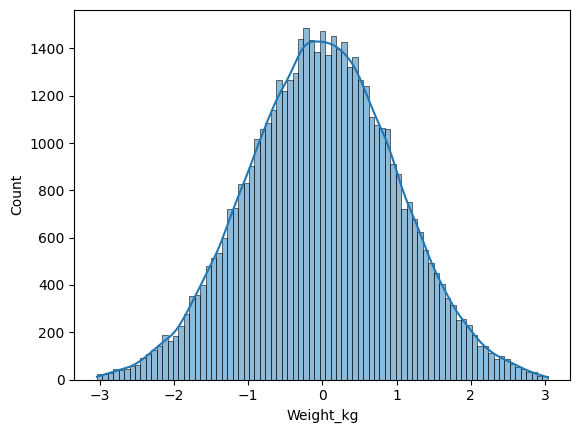

In [25]:
sns.histplot(df['Weight_kg'], kde=True)
plt.show()

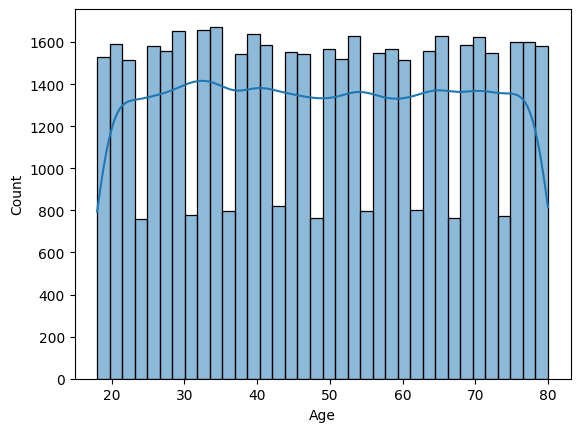

In [26]:
sns.histplot(df['Age'],kde=True)
plt.show()

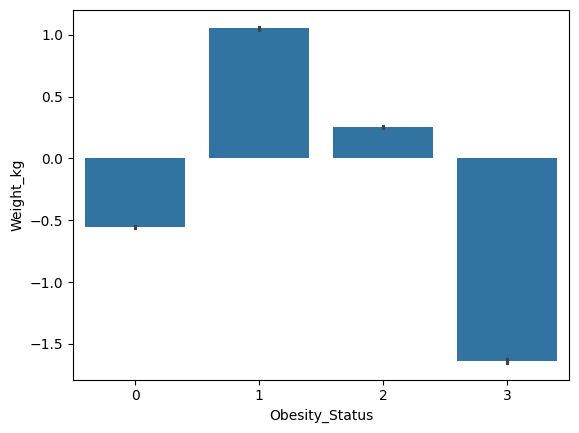

In [27]:
sns.barplot(x=df['Obesity_Status'], y=df['Weight_kg'])
plt.show()

In [28]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)

In [29]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [31]:
lr=LogisticRegression()
lp={
    'C':[0.01,0.1,1.0,10,100,200,300,400],
    # 'penalty':['l1','l2'],
    'solver':['liblinear','saga','lbfgs']
}
grid_lr = GridSearchCV(lr, lp, cv=5, scoring='accuracy')
grid_lr.fit(x_train, y_train)
print(grid_lr.best_params_)

{'C': 100, 'solver': 'saga'}


In [32]:
dt=DecisionTreeClassifier()
dp={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
}
grid_dt = GridSearchCV(dt, dp, cv=5, scoring='accuracy')
grid_dt.fit(x_train, y_train)
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [33]:
rf = RandomForestClassifier()
rp={
    'n_estimators':[10,20,30,40,50,60,],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, rp, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)
print(grid_rf.best_params_)

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 40}


In [34]:
svc = SVC()
sp={
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svc = GridSearchCV(svc, sp, cv=5, scoring='accuracy')
grid_svc.fit(x_train, y_train)
print(grid_svc.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [35]:
xgb = XGBClassifier()
xp={
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_xgb = GridSearchCV(xgb, xp, cv=5, scoring='accuracy')
grid_xgb.fit(x_train, y_train)
print(grid_xgb.best_params_)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}


In [36]:
lr = LogisticRegression(C=100, solver='saga')
lr.fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)

dt = DecisionTreeClassifier(criterion='gini',max_depth=2)
dt.fit(x_train, y_train)
y_pred_dt=dt.predict(x_test)

rf = RandomForestClassifier(max_depth=10,min_samples_split=5,n_estimators=50)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)

svc = SVC(C=10,gamma='scale',kernel='linear')
svc.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)

xgb = XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=100)
xgb.fit(x_train, y_train)
y_pred_xgb=xgb.predict(x_test)

In [37]:
print("Logistic Regression: ", accuracy_score(y_pred_lr,y_test))
print("DecisionTreeClassifier: ", accuracy_score(y_pred_dt,y_test))
print("RandomForestClassifier: ", accuracy_score(y_pred_rf,y_test))
print("SVC: ", accuracy_score(y_pred_svc,y_test))
print("XGBoost: ",accuracy_score(y_pred_xgb, y_test))

Logistic Regression:  0.9655
DecisionTreeClassifier:  0.9998
RandomForestClassifier:  1.0
SVC:  0.9985
XGBoost:  0.9979


In [38]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00


In [45]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import pickle
import numpy as np # added import

tabnet_model = TabNetClassifier(n_d=64, n_a=8, lambda_sparse=0.001, gamma=1.0,
                                optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr=2e-2),
                                mask_type='entmax')
tabnet_model.fit(
    x_train.values, y_train, # Changed to x_train.values
    eval_set=[(x_val.values, y_val)], # Changed to x_val.values
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128
)

# Evaluate on test set and save model
y_pred = tabnet_model.predict(x_test.values) # Changed to x_test.values
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

with open("tabnet_obesity_model.pkl", "wb") as model_file:
    pickle.dump(tabnet_model, model_file)

epoch 0  | loss: 0.51174 | val_0_accuracy: 0.2605  |  0:00:03s
epoch 1  | loss: 0.17915 | val_0_accuracy: 0.2609  |  0:00:08s
epoch 2  | loss: 0.15737 | val_0_accuracy: 0.2683  |  0:00:11s
epoch 3  | loss: 0.13408 | val_0_accuracy: 0.2788  |  0:00:15s
epoch 4  | loss: 0.12305 | val_0_accuracy: 0.3111  |  0:00:18s
epoch 5  | loss: 0.13397 | val_0_accuracy: 0.437   |  0:00:23s
epoch 6  | loss: 0.13235 | val_0_accuracy: 0.5132  |  0:00:26s
epoch 7  | loss: 0.11911 | val_0_accuracy: 0.6542  |  0:00:29s
epoch 8  | loss: 0.12249 | val_0_accuracy: 0.778   |  0:00:33s
epoch 9  | loss: 0.11518 | val_0_accuracy: 0.8363  |  0:00:38s
epoch 10 | loss: 0.10307 | val_0_accuracy: 0.8595  |  0:00:41s
epoch 11 | loss: 0.10391 | val_0_accuracy: 0.9358  |  0:00:44s
epoch 12 | loss: 0.11866 | val_0_accuracy: 0.9279  |  0:00:47s
epoch 13 | loss: 0.10349 | val_0_accuracy: 0.9296  |  0:00:52s
epoch 14 | loss: 0.09879 | val_0_accuracy: 0.9692  |  0:00:56s
epoch 15 | loss: 0.10434 | val_0_accuracy: 0.9302  |  0

In [46]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import numpy as np

# Define numeric columns used for scaling
numeric_cols = ['Age', 'Height_cm', 'Weight_kg', 'BMI']

# Load model and scaler
with open("tabnet_obesity_model.pkl", "rb") as model_file:
    tabnet_model = pickle.load(model_file)
with open("scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

# Define labels
obesity_labels = {0: 'Underweight', 1: 'Normal Weight', 2: 'Overweight', 3: 'Obese'}

# Streamlit app setup
st.title("Obesity Level Prediction App")
st.write("This app predicts your obesity level based on health factors.")

# Collect user inputs
age = st.number_input("Enter your age", min_value=1, max_value=100, step=1)
gender = st.selectbox("Select your gender", ["Male", "Female"])
height = st.number_input("Enter your height (in cm)", min_value=100.0, max_value=250.0, step=0.1)
weight = st.number_input("Enter your weight (in kg)", min_value=30.0, max_value=300.0, step=0.1)
physical_activity = st.selectbox("Physical Activity Level", ["Low", "Moderate", "High"])
diet_type = st.selectbox("Diet Type", ["Balanced", "High Protein", "Low Carb", "Vegetarian", "Vegan"])
smoking_habits = st.selectbox("Smoking Habits", ["Non-Smoker", "Former Smoker", "Current Smoker"])
alcohol_consumption = st.selectbox("Alcohol Consumption", ["None", "Moderate", "Heavy"])
family_history = st.selectbox("Family History of Obesity", ["No", "Yes"])
blood_pressure = st.selectbox("Blood Pressure Status", ["Normal", "Prehypertension", "Hypertension Stage 1", "Hypertension Stage 2"])
cholesterol_levels = st.selectbox("Cholesterol Levels", ["Normal", "Borderline High", "High"])
education_level = st.selectbox("Education Level", ["No formal education", "High School", "College", "Postgraduate"])
income_level = st.selectbox("Income Level", ["Low", "Middle", "High"])
geographical_region = st.selectbox("Geographical Region", ["Urban", "Suburban", "Rural"])

# Calculate BMI
bmi = weight / ((height / 100) ** 2)

# Convert categorical features to numeric
gender_numeric = 1 if gender == "Male" else 0
physical_activity_numeric = {"Low": 0, "Moderate": 1, "High": 2}[physical_activity]
diet_type_numeric = {"Balanced": 0, "High Protein": 1, "Low Carb": 2, "Vegetarian": 3, "Vegan": 4}[diet_type]
smoking_habits_numeric = {"Non-Smoker": 0, "Former Smoker": 1, "Current Smoker": 2}[smoking_habits]
alcohol_consumption_numeric = {"None": 0, "Moderate": 1, "Heavy": 2}[alcohol_consumption]
family_history_numeric = 1 if family_history == "Yes" else 0
blood_pressure_numeric = {"Normal": 0, "Prehypertension": 1, "Hypertension Stage 1": 2, "Hypertension Stage 2": 3}[blood_pressure]
cholesterol_levels_numeric = {"Normal": 0, "Borderline High": 1, "High": 2}[cholesterol_levels]
education_level_numeric = {"No formal education": 0, "High School": 1, "College": 2, "Postgraduate": 3}[education_level]
income_level_numeric = {"Low": 0, "Middle": 1, "High": 2}[income_level]
geographical_region_numeric = {"Urban": 0, "Suburban": 1, "Rural": 2}[geographical_region]

# Prepare input data for prediction
input_data = pd.DataFrame([[age, gender_numeric, height, weight, bmi,
                            physical_activity_numeric, diet_type_numeric, smoking_habits_numeric,
                            alcohol_consumption_numeric, family_history_numeric,
                            blood_pressure_numeric, cholesterol_levels_numeric,
                            education_level_numeric, income_level_numeric, geographical_region_numeric]],
                          columns=['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI',
                                   'Physical_Activity_Level', 'Diet_Type', 'Smoking_Habits',
                                   'Alcohol_Consumption', 'Family_History_Obesity',
                                   'Blood_Pressure', 'Cholesterol_Levels',
                                   'Education_Level', 'Income_Level', 'Geographical_Region'])

# Scale numeric columns
input_data[numeric_cols] = scaler.transform(input_data[numeric_cols])

# Predict and display result
if st.button("Predict Obesity Level"):
    prediction = tabnet_model.predict(input_data.to_numpy())[0]
    prediction_label = obesity_labels.get(prediction, "Unknown Class")
    st.subheader("Predicted Obesity Level:")
    st.write(f"**{prediction_label}**")

Writing app.py


In [47]:
!streamlit run '/content/app.py' & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

/bin/bash: line 1: streamlit: command not found
35.222.69.67
Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 